In [453]:
!pip install nltk

In [454]:
import nltk

In [455]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [456]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize

import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from nltk.stem import PorterStemmer
from sklearn import metrics 

In [457]:
df = pd.read_csv("C:\Praktikum 1\Bahan data\ISEAR.csv", header=None)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\HP\AppData\Local\Temp\ipykernel_2876\2958725244.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("C:\Praktikum 1\Bahan data\ISEAR.csv", header=None)


,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [458]:
col = [0,1] 
new_df = df[col] 
new_df = new_df[pd.notnull(df[1])] 
new_df.columns = ['Emotion', 'Text'] 
new_df.head() 

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


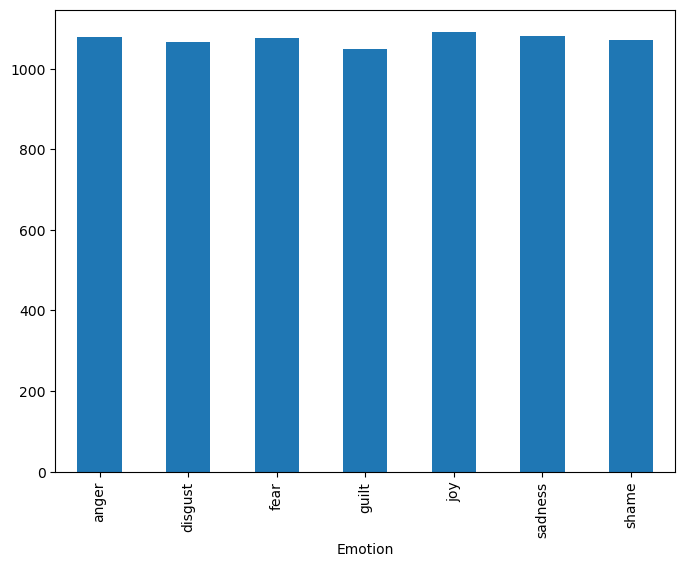

In [459]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [460]:
new_df['Text']
new_df['Emotion']

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: Emotion, Length: 7516, dtype: object

In [461]:
def getTokenizedList(input_df):
    tokenizedList=[]
    for i in range(0,len(input_df)):
        curText=input_df[1].iloc[i]
        curText=curText.replace('\n','')
        curTokenized=word_tokenize(curText)
        tokenizedList.append(curTokenized)
    #print(tokenizedList)
    tokenziedListWithoutPunct=[]
    punctList=list(string.punctuation)
    for i in range(0,len(tokenizedList)):
        curList=tokenizedList[i]
        newList=[] #list without stopwords
        for word in curList:
            if (word.lower() not in punctList):
                newList.append(word.lower())
        tokenziedListWithoutPunct.append(newList)

    #print(tokenziedListWithoutPunct)
    #Stemming
    mystemmer=PorterStemmer()
    tokenziedStemmed=[]
    for i in range(0,len(tokenziedListWithoutPunct)):
        curList=tokenziedListWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [462]:
def transformSentence(sent):
    s = []
    sent=sent.replace('\n','')
    sentTokenized=word_tokenize(sent)
    s.append(sentTokenized)
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentList.append(word.lower())
    sWithoutPunct.append(newSentList)
    mystemmer = PorterStemmer()
    tokenziedStemmed = []
    for i in range(0,len(sWithoutPunct)):
        curList=sWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [463]:
new_df['Text'] = getTokenizedList(df)
#new_df['Text']

In [464]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df['Text'], new_df['Emotion'], test_size=.3, random_state=1)

In [465]:
#Function to pass the List to the Tfidf vectorizer
def returnPhrase (inputList):
    return inputList

In [466]:
#Extracting features for Naive Bayes
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train) #tanpatoarray()
transformedTest=myVectorizer.transform(X_test)#tanpatoarray()

In [467]:
#Extracting features for Naive Bayes
from sklearn.feature_extraction.text import TfidfVectorizer
# Menggunakan TfidfVectorizer dengan max_features untuk mengurangi memori
myVectorizer = TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1, 3))
myVectorizer.fit(X_train)
transformedTrain = myVectorizer.transform(X_train) #.toarray()  # tanpa menggunakan toarray
transformedTest = myVectorizer.transform(X_test) #.toarray()    # tanpa menggunakan toarray

In [468]:
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain,Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print(curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.5835920177383592


In [469]:
print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : Naive Bayes
              precision    recall  f1-score   support

       anger       0.51      0.47      0.49       331
     disgust       0.72      0.50      0.59       324
        fear       0.62      0.70      0.66       311
       guilt       0.43      0.62      0.51       299
         joy       0.69      0.69      0.69       323
     sadness       0.68      0.60      0.64       351
       shame       0.52      0.51      0.52       316

    accuracy                           0.58      2255
   macro avg       0.60      0.58      0.58      2255
weighted avg       0.60      0.58      0.59      2255



In [470]:
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3)) 
myVectorizer.fit(X_train) 
transformedTrain=myVectorizer.transform(X_train) #.toarray() 
transformedTest=myVectorizer.transform(X_test) #.toarray() 

In [471]:
curC=2
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain, Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best Acc SVM')
#print(curC)
print(np.sum(myPredTest==Y_test)/len(Y_test))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best Acc SVM
0.6124168514412417


In [472]:
print('Metrics Classification Report : SVM')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : SVM
              precision    recall  f1-score   support

       anger       0.53      0.55      0.54       331
     disgust       0.67      0.60      0.63       324
        fear       0.65      0.72      0.69       311
       guilt       0.50      0.56      0.53       299
         joy       0.70      0.71      0.70       323
     sadness       0.67      0.65      0.66       351
       shame       0.56      0.50      0.53       316

    accuracy                           0.61      2255
   macro avg       0.61      0.61      0.61      2255
weighted avg       0.61      0.61      0.61      2255



In [473]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred=NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [474]:
#To predict the emotion of a sentence using SVM
def predictSentSVM(sent):
    sentPred=SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [475]:
sent = "I love you to the moon and back"

#printing the predicted emotion
print("Navie bayes prediction")
print(predictSentNB(sent))
print("SVM prediction")
print(predictSentSVM(sent))


Navie bayes prediction
['joy']
SVM prediction
['joy']


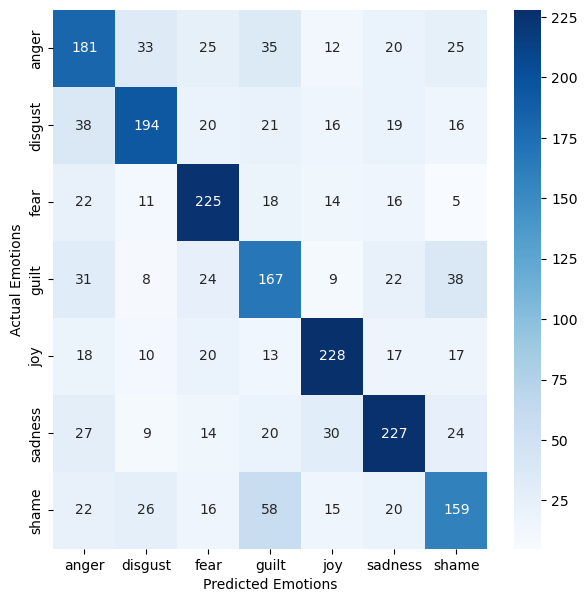

In [476]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']

cm = confusion_matrix(Y_test, myPredTest ,labels=labels)  # Perhatikan baris ini

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()

In [477]:
#LATIHAN 2
# Import library dan package yang dibutuhkan
import numpy as np  # untuk perhitungan saintifik
import matplotlib.pyplot as plt  # untuk plotting
from sklearn.linear_model import LinearRegression  # import Library LinearRegression dari scikit-learn


In [478]:
# Buat data
penjualan = np.array([6, 5, 5, 4, 4, 3, 2, 2, 2, 1])  # Perbaiki tanda kurung
harga = np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])


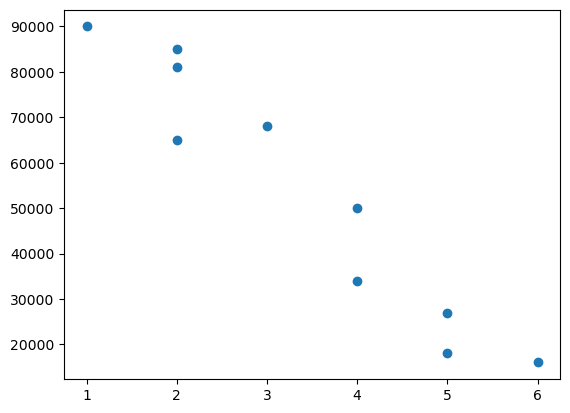

In [479]:
# Buat plot
%matplotlib inline
plt.scatter(penjualan, harga)

In [480]:
# buat permodelan regresi
penjualan = penjualan.reshape(-1,1) # kita tukar baris dan kolom variabel ini, agar # untuk lebih lengkapnya baca teori soal perhitungan regresi linier

linreg = LinearRegression()
linreg.fit(penjualan, harga)

LinearRegression()

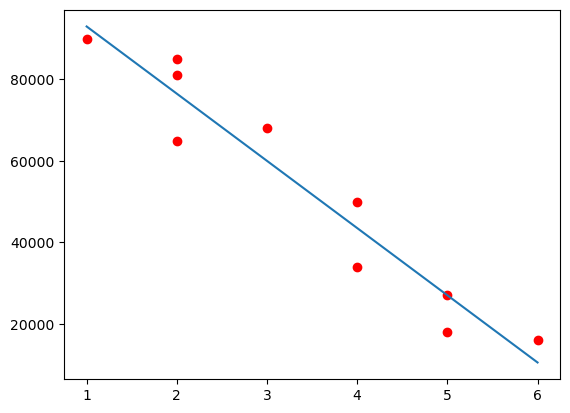

In [481]:
# plot hasil regresi
plt.scatter(penjualan, harga, color='red')
plt.plot(penjualan, linreg.predict(penjualan))

In [482]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [483]:
# Load data FuelConsumption.csv
df = pd.read_csv("C:\Praktikum 1\Bahan data\FuelConsumptionCo2.csv")

# Tampilkan 5 baris pertama data
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\HP\AppData\Local\Temp\ipykernel_2876\1058723101.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("C:\Praktikum 1\Bahan data\FuelConsumptionCo2.csv")


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [484]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


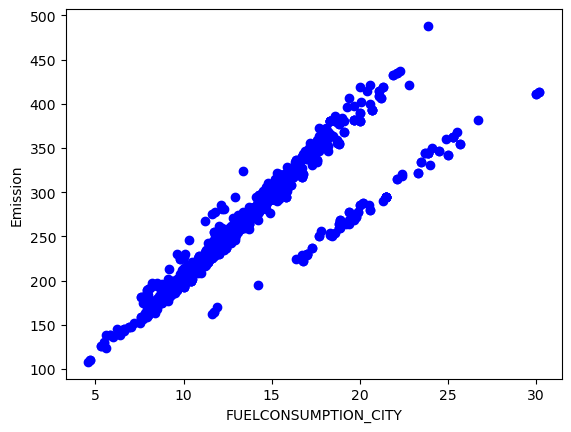

In [485]:
#Kitaplothubungannya
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

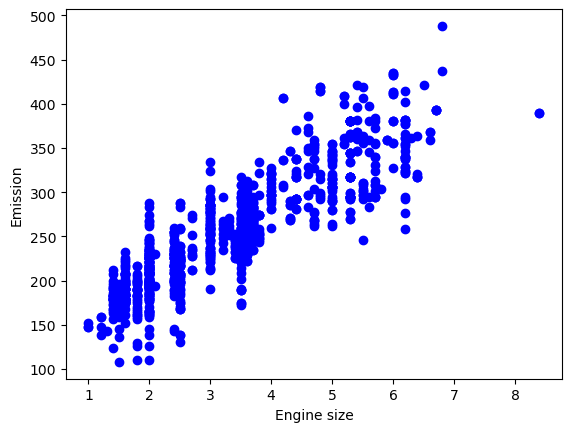

In [486]:
# Kita plot hubungannya
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [487]:
#Melakukan Data Splitting
# Membagi data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

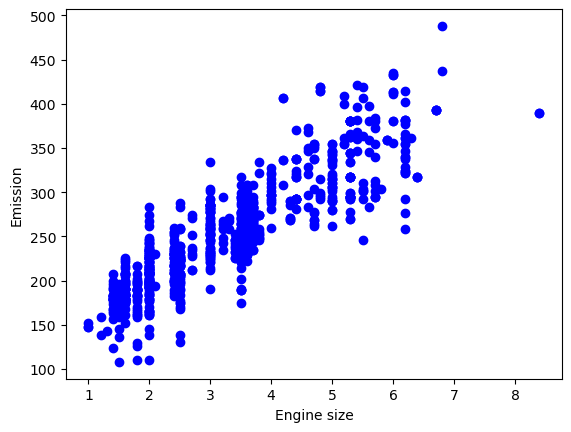

In [488]:
# Di sini kita akan mencari hubungan antara ukuran mesin dengan emisi CO2
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [489]:
# Membuat Model Regresi
# Membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.44144224]]
Intercept:  [124.37166417]


Text(0, 0.5, 'Emission')

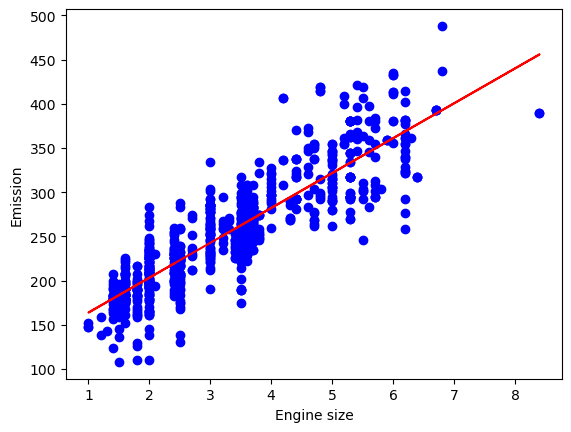

In [490]:
# Plot hasil regresi
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [491]:
#Menghitung error
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.71
Residual sum of squares (MSE): 1018.76
R2-score: 0.75


In [533]:
#LATIHAN 3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import joblib

In [537]:
# url tidak perlu diubah
url='https://drive.google.com/file/d/1ha7myG8v2BTscrImtRuALFRRaApNvN_h/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [539]:
print(f"Data berisi {df.shape[0]} baris dan {df.shape[1]} kolom.\ndengan pratinjau 5 sampel sebagai berikut:\n")
df.head()

Data berisi 50 baris dan 5 kolom.
dengan pratinjau 5 sampel sebagai berikut:



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [543]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [545]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [547]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [549]:
y_pred = regression.predict(X_test)

mean_absolute_error(y_test, y_pred)

8573.801944370183

In [551]:
joblib.dump(regression, "hasil_pelatihan_model.pkl")

['hasil_pelatihan_model.pkl']

In [553]:
RnD_Spend = 0
Administration_Spend = 20
Marketing_Spend = 3
pred_args = [RnD_Spend,Administration_Spend,Marketing_Spend]
pred_args_arr = np.array(pred_args)
pred_args_arr = pred_args_arr.reshape(1, -1)
mul_reg = open("hasil_pelatihan_model.pkl","rb")
ml_model = joblib.load(mul_reg)
model_prediction = ml_model.predict(pred_args_arr)

print(f'Prediksi profit yang didapatkan adalah... ${round(float(model_prediction), 2)}')

Prediksi profit yang didapatkan adalah... $49027.7


C:\Users\HP\AppData\Local\Temp\ipykernel_2876\1170555932.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Prediksi profit yang didapatkan adalah... ${round(float(model_prediction), 2)}')
